<a href="https://colab.research.google.com/github/FaithKare/Supervised-and-Unsupersived-learning-in-R-/blob/master/Supervised_Learning_Week_13_part_1_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question 

## a) Specyfing the analysis question 

Identify which individuals are most likely to click on a Kenyan enterprenuer's online cryptography course adverts given certain characteristics.

## b) Metric of Success

The metric of successs of this analysis is When the individuals who are most likely to click on the ads have been identified based on thier age, gender, the country their from, the daily time they spend on the site, 

## c) Understanding the context

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.

## d) Experimental design 

Data Loading 

Data Cleaning

Exploratory Data Science 

> Univariate Analysis 

> Bivariate Analysis 

Modelling 

> Decision Trees

> SVM Modelling

> Binary Classification with logistic regression





# 2. Data Loading and Checking 

In [1]:
# loading the advertising data 
data <- read.csv("advertising.csv",na.strings=c(""," ","NA"))


In [2]:
# preview of the first 6 data entries 
head(data)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [3]:
# checking the class of the data
class(data)

[1] "data.frame"

In [4]:
# Checking for the number of rows and columns
dim(data)

[1] 1000   10

In [5]:
# cheking the structure of the dataframe 
str(data)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


# 3. Data Cleaning 

In [6]:
# Find out total missing values in each column 
# by using the function colSums()

colSums(is.na(data))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

There are no missing values in this dataframe

In [7]:
# Checking for dupicated rows
duplicate_rows <- data[duplicated(data),]
duplicate_rows

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>


There are no duplicated rows in this dataframe

In [8]:
# Identify numeric columns
num_cols <- unlist(lapply(data, is.numeric))
num_cols


Daily.Time.Spent.on.Site                      Age              Area.Income 
                    TRUE                     TRUE                     TRUE 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                    TRUE                    FALSE                    FALSE 
                    Male                  Country                Timestamp 
                    TRUE                    FALSE                    FALSE 
           Clicked.on.Ad 
                    TRUE

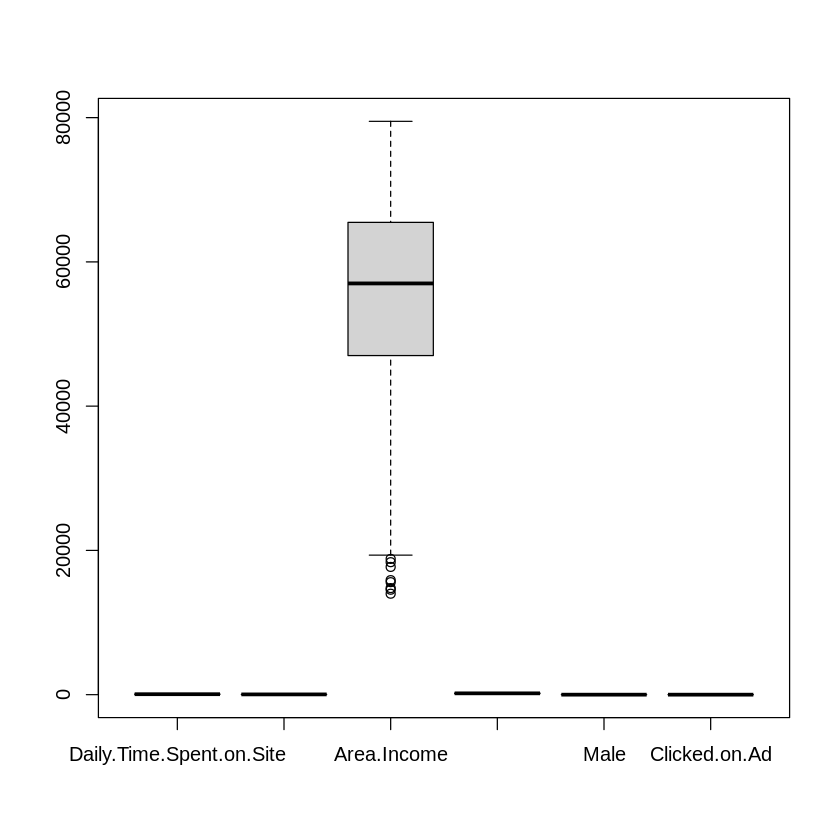

In [9]:
# Evaluating if there are any outliers in the numeric class
#Subset numeric columns of data
data_num <- data[ ,num_cols]  

#plotting the outliers in the numerical columns.                       
boxplot(data_num) 


 There were only outliers in the Area Income column

In [10]:
# Checking the number of outliers
# Then use the function boxplot.stats which lists the outliers in the area income

boxplot.stats(data$'Area.Income')$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

These outliers will not be removed in this analysis since income is relative to each individual. 

# 4. Exploratory Data Analysis 

## Univariate Analysis

**Measures of Central Tendancy**

In [11]:
# We create the mode function that will perform our mode operation for us
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [12]:
#Measures of central tendancy of the column area income
# getting the mean 
AreaIncome_mean <- mean(data$Area.Income)
print(AreaIncome_mean)

#getting the median 
AreaIncome_median <- median(data$Area.Income)
print(AreaIncome_median)

# getting the mode
AreaIncome_mode <- getmode(data$Area.Income)
print(AreaIncome_mode) 


[1] 55000
[1] 57012.3
[1] 61833.9


In [13]:
# measures of central tendancy of the column age 
# getting the mean 
Age_mean <- mean(data$Age)
print(Age_mean)

#getting the median 
Age_median <- median(data$Age)
print(Age_median)

# getting the mode
Age_mode <- getmode(data$Age)
print(Age_mode) 


[1] 36.009
[1] 35
[1] 31


In [14]:
# measures of central tendancy of the column daily time spent on site
# getting the mean 
Time_mean <- mean(data$Daily.Time.Spent.on.Site)
print(Time_mean)

#getting the median 
Time_median <- median(data$Daily.Time.Spent.on.Site)
print(Time_median)

# getting the mode
Time_mode <- getmode(data$Daily.Time.Spent.on.Site)
print(Time_mode) 

[1] 65.0002
[1] 68.215
[1] 62.26


In [15]:
# measures of central tendancy of the column daily internet usage
# getting the mean 
Internet_mean <- mean(data$Daily.Internet.Usage)
print(Internet_mean)

#getting the median 
Internet_median <- median(data$Daily.Internet.Usage)
print(Internet_median)

# getting the mode
Internet_mode <- getmode(data$Daily.Internet.Usage)
print(Internet_mode) 

[1] 180.0001
[1] 183.13
[1] 167.22


The average area income is 55000 , average age of the individuals browssing the site is 36 years and the average time an individual spent on the site is 65 while the average daly internet usage of a browser is 180.

**Measures of Dispersion** 

In [16]:
# measures of dispersion of the column daily time spent on site 
#gettng the first , third quantiles and range
Quantile <- quantile(data$Daily.Time.Spent.on.Site)
print(Quantile)

# getting the range 
# the minimun and the maximum value in this column
Range <- range(data$Daily.Time.Spent.on.Site)
print(Range)

#getting the variance
# measure of how values are dispensed around the mean 
Variance <- var(data$Daily.Time.Spent.on.Site)
print(Variance)

# getting the standard deviation 
# the square root of the variance.
Standard_Deviation <- sd(data$Daily.Time.Spent.on.Site)
print(Standard_Deviation) 

     0%     25%     50%     75%    100% 
32.6000 51.3600 68.2150 78.5475 91.4300 
[1] 32.60 91.43
[1] 251.3371
[1] 15.85361


In [17]:
# measures of dispersion of the column area income
#gettng the first , third quantiles and range
Quantile <- quantile(data$Area.Income)
print(Quantile)

# getting the range 
# the minimun and the maximum value in this column
Range <- range(data$Area.Income)
print(Range)

#getting the variance
# measure of how values are dispensed around the mean 
Variance <- var(data$Area.Income)
print(Variance)

# getting the standard deviation 
# the square root of the variance.
Standard_Deviation <- sd(data$Area.Income)
print(Standard_Deviation) 

      0%      25%      50%      75%     100% 
13996.50 47031.80 57012.30 65470.64 79484.80 
[1] 13996.5 79484.8
[1] 179952406
[1] 13414.63


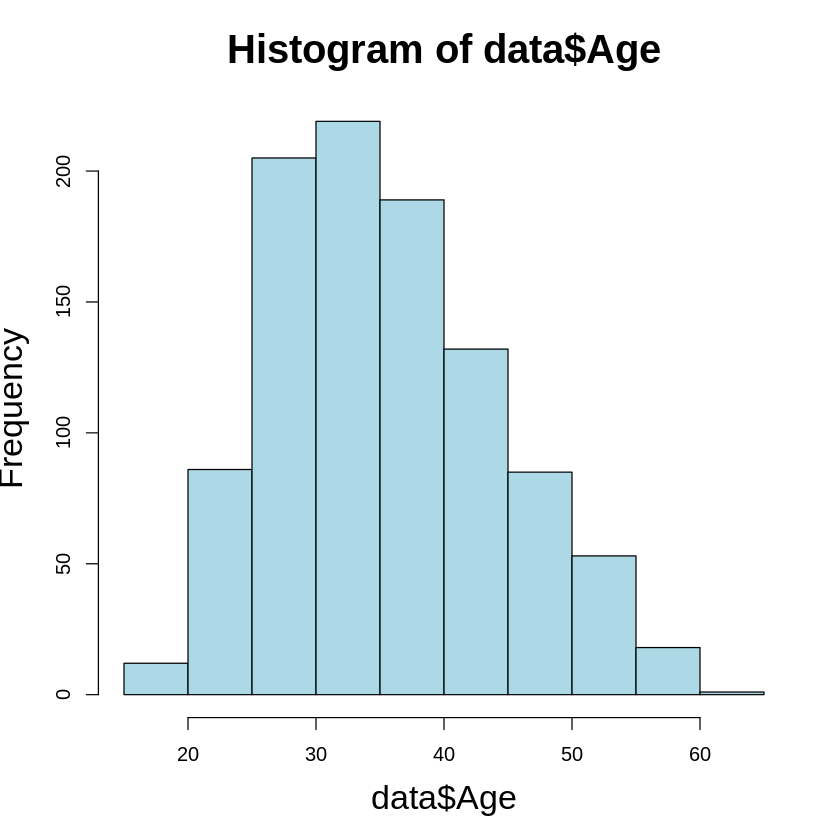

In [18]:
# distribution of the age of the individuals who browsed the site 
hist(data$Age,col = 'lightblue', cex.main = 2, cex.lab = 1.7)

The distribution follows a normal distribution with the most individulas who browsed the site being between the age of 25 and 35.

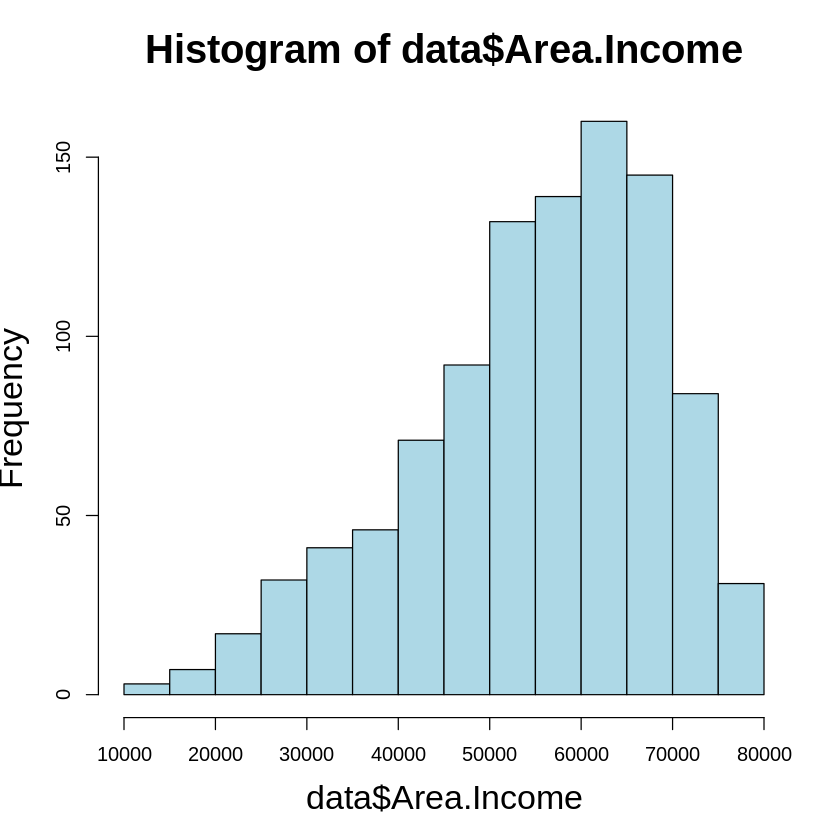

In [19]:
# distribution of the area income of the individuals
hist(data$Area.Income,col = 'lightblue', cex.main = 2, cex.lab = 1.7)

Most individuals who browssed earned more than the mean area income of 55000.

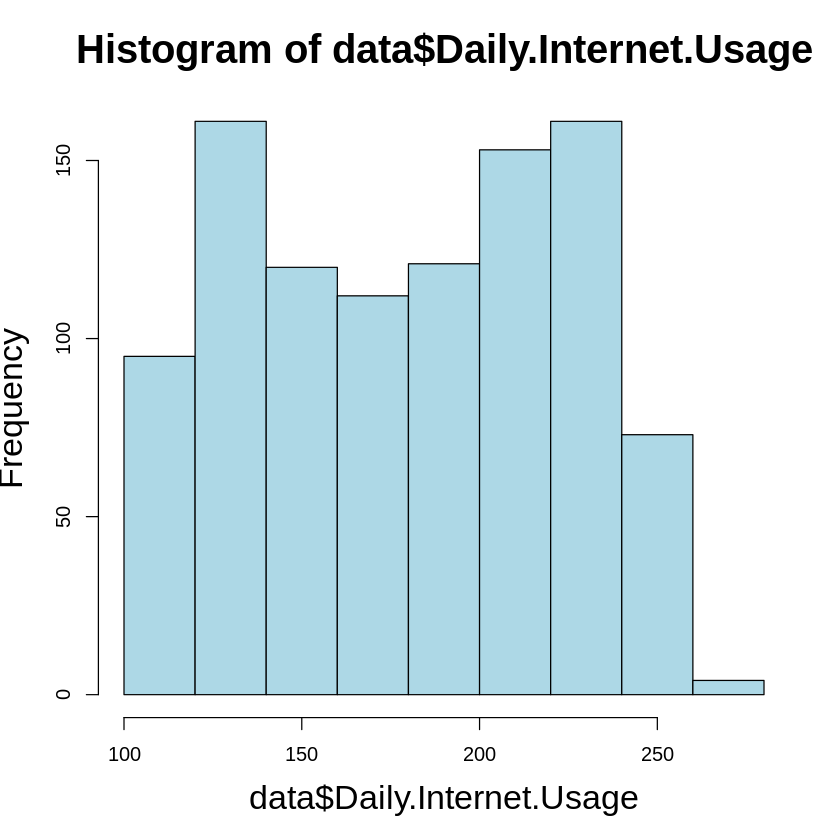

In [20]:
# distribution of the daily internet usage of the individuals browsiing
hist(data$Daily.Internet.Usage,col = 'lightblue', cex.main = 2, cex.lab = 1.7)

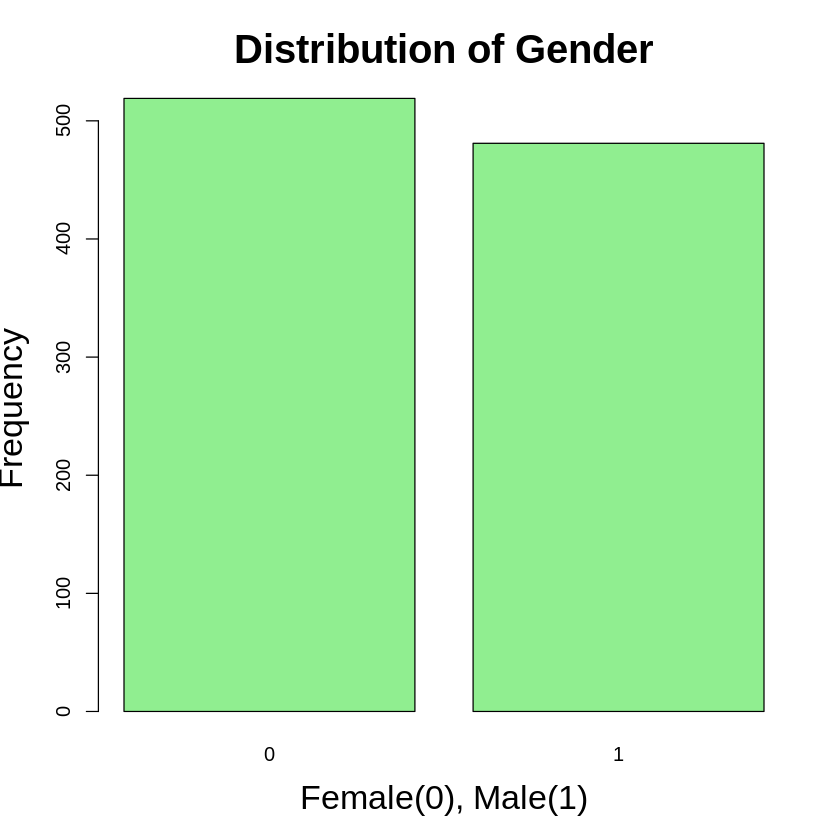

In [21]:
# Fetching the male column from the dataframe
Gender <- data$Male

# Applying the table() function will compute the frequency distribution of the gender
genderfrequency <- table(Gender)

# Then applying the barplot function to produce its bar graph
barplot(genderfrequency, col = 'lightgreen', main = "Distribution of Gender" , xlab = 'Female(0), Male(1)', ylab = 'Frequency',cex.main = 2, cex.lab = 1.7)

Out of the 1000 browsing individuals there were slightly more females than males.

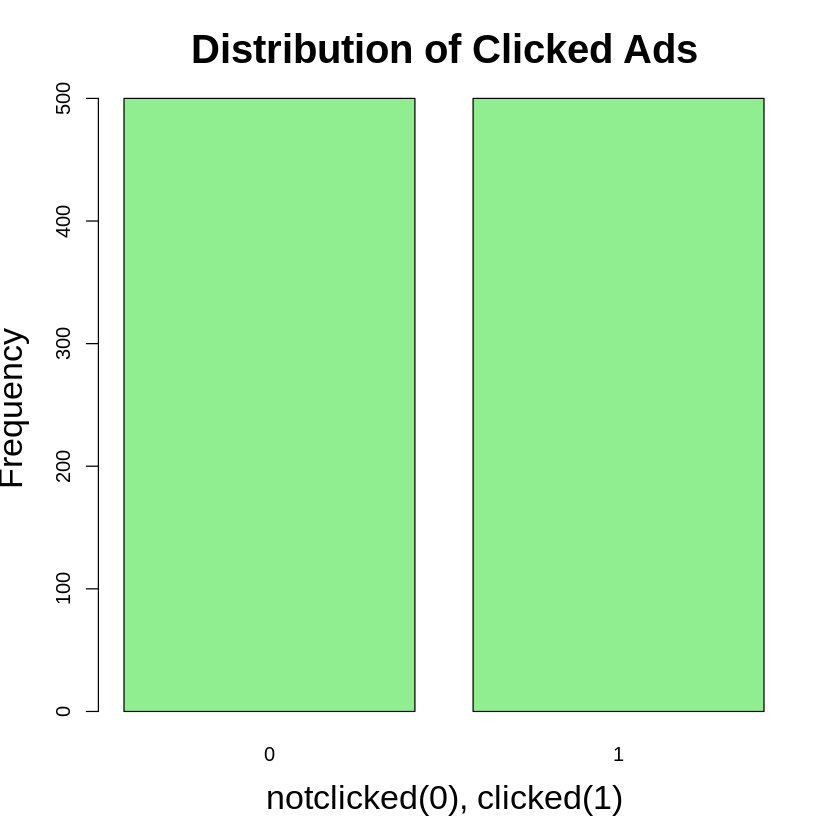

In [22]:
# Fetching the clicked on ad column from the dataframe
Clicked <- data$Clicked.on.Ad

# Applying the table() function will compute the frequency distribution 
clickedadfrequency <- table(Clicked)

# Then applying the barplot function to produce its bar graph
barplot(clickedadfrequency, col = 'lightgreen', main = "Distribution of Clicked Ads" , xlab = 'notclicked(0), clicked(1)', ylab = 'Frequency',cex.main = 2, cex.lab = 1.7)

Out of the 1,000 browsing individuals,500 people clicked on the advert whereas an equal numeber did not.

## Bivariate Analysis

In [23]:
# correlation matrix of the numerical columns 
cor(data_num)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad
Daily.Time.Spent.on.Site,1.00000000,-0.33151334,0.310954413,0.51865848,-0.018950855,-0.74811656
Age,-0.33151334,1.00000000,-0.182604955,-0.36720856,-0.021044064,0.49253127
Area.Income,0.31095441,-0.18260496,1.000000000,0.33749553,0.001322359,-0.47625463
Daily.Internet.Usage,0.51865848,-0.36720856,0.337495533,1.00000000,0.028012326,-0.78653918
Male,-0.01895085,-0.02104406,0.001322359,0.02801233,1.000000000,-0.03802747
Clicked.on.Ad,-0.74811656,0.49253127,-0.476254628,-0.78653918,-0.038027466,1.00000000


The correlation shows that there's a strong negative correlation between clicked on ads and daily time spent on site and daily internet usage. Which means that the more the individual spent time on the site and the more they used internet the less likely they would click on an ad. 

In [24]:
# Installing ggcorrplot package
install.packages("ggcorrplot") 
# loading the ggcorrplot library       
library("ggcorrplot") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Loading required package: ggplot2



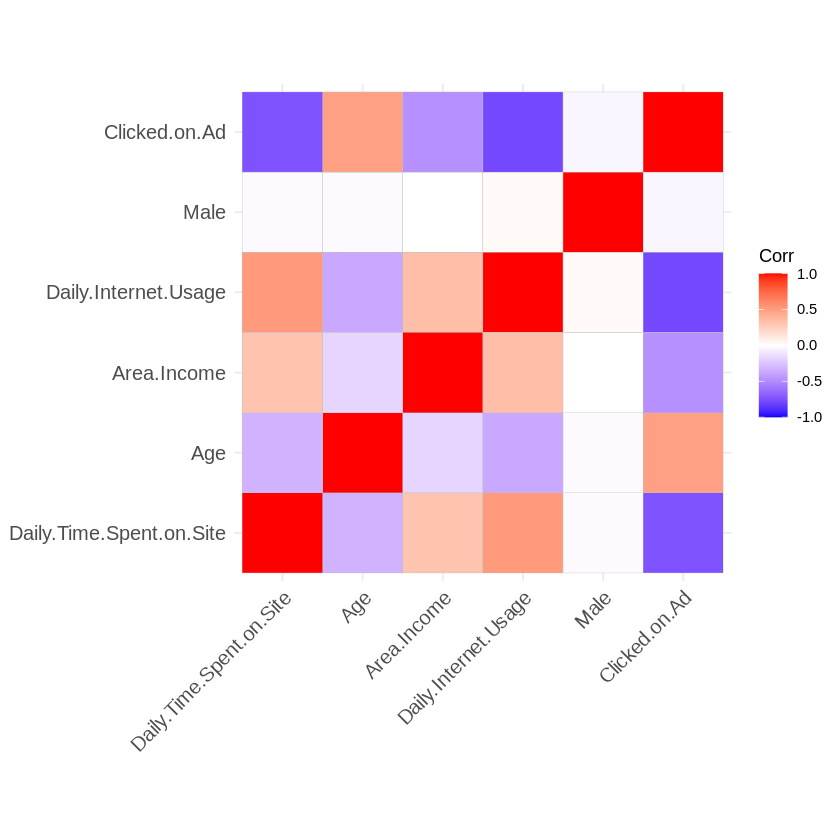

In [25]:
#Now, we can use the ggcorrplot to create a correlation graph in the style of the ggplot2 package.
# coreelation heatmap
ggcorrplot(cor(data_num))

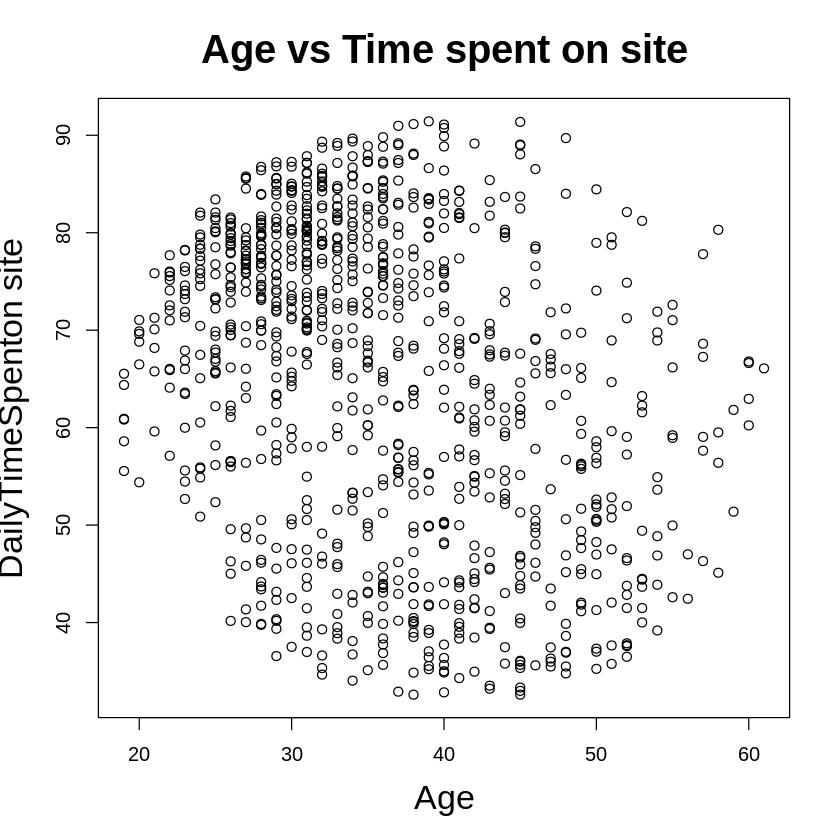

In [26]:
# scatter plot of age vs daily time spent on the site
plot(x = data$Age, y = data$Daily.Time.Spent.on.Site,
     xlab = "Age",
     ylab = "DailyTimeSpenton site",
     main = "Age vs Time spent on site",
     cex.main = 2 , cex.lab =1.7
)

The scatter plot shows there no relationship between an indiviiduals age and the the time they spent on the site.

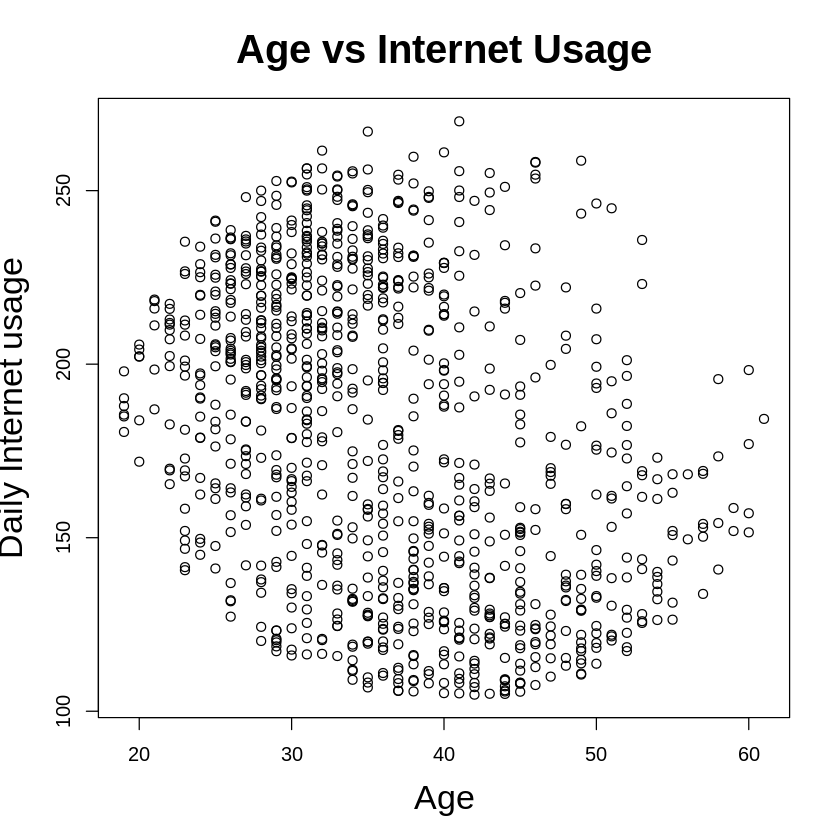

In [27]:
# scatter plot of age vs internet usage
plot(x = data$Age, y = data$Daily.Internet.Usage,
     xlab = "Age",
     ylab = "Daily Internet usage",
     main = "Age vs Internet Usage",
     cex.main = 2 , cex.lab =1.7
)

The scatter plot shows there no relationship between an indiviiduals age and the daily internet usage

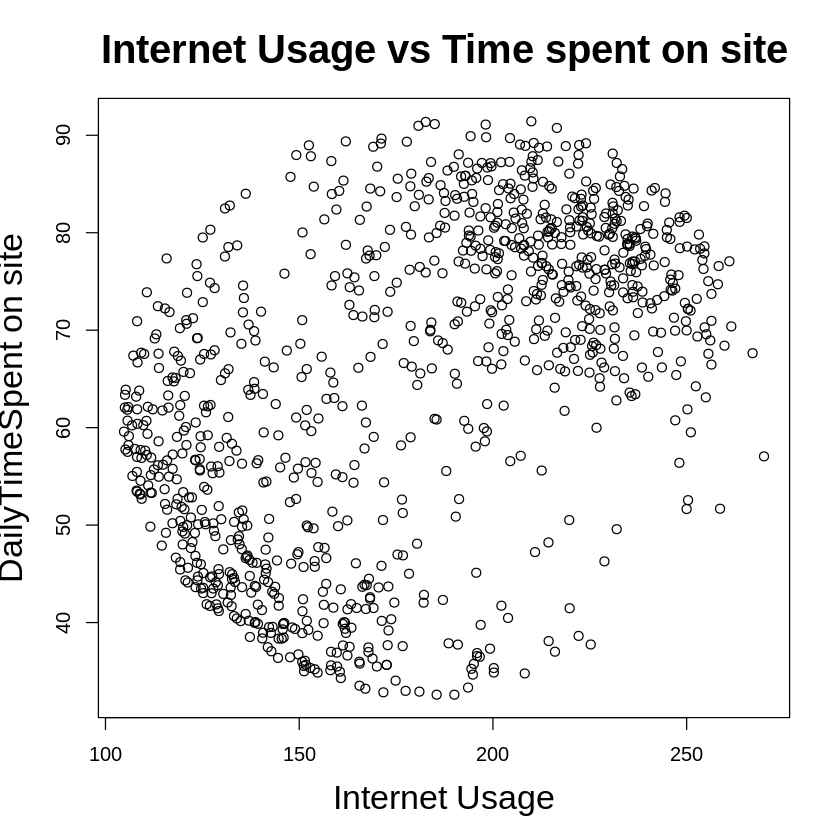

In [28]:
# scatter plot of daily internet usage and daily tme spent on the site
plot(x = data$Daily.Internet.Usage, y = data$Daily.Time.Spent.on.Site,
     xlab = "Internet Usage",
     ylab = "DailyTimeSpent on site",
     main = "Internet Usage vs Time spent on site",
     cex.main = 2 , cex.lab =1.7
)

The scatter plot shows there no relationship between daily time spent on the site and the daily internet usage

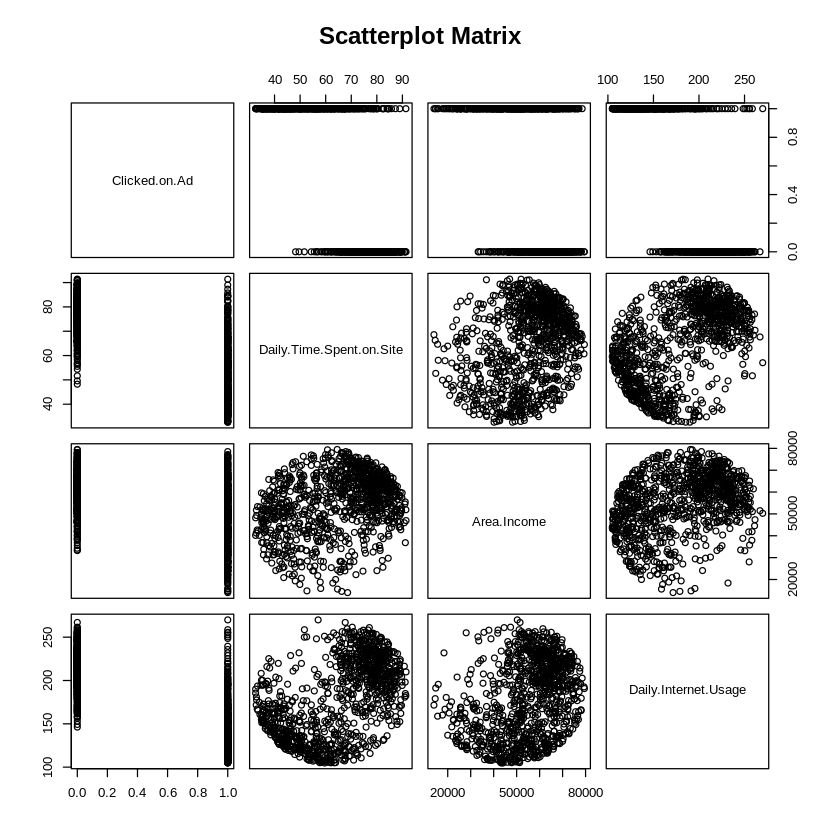

In [29]:
# pairplot of the variables
pairs(~Clicked.on.Ad + Daily.Time.Spent.on.Site + Area.Income + Daily.Internet.Usage, data = data,
       main = "Scatterplot Matrix" )

# 5. Implementing the Solution

We will now compare the clicked on ads to the gender , age, the top 10 countries the individuals are from , the daily time an idividuals spent on the internet and the daily internt usage of the individual.   

In [ ]:
#create a dataframe on only individuals who clicked on the ads
advert_click <- data[data$Clicked.on.Ad == 1,]

#preview of the dataframe
head(advert_click)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
8,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
11,47.64,49,45632.51,122.02,Centralized neutral neural-net,West Brandonton,0,Qatar,2016-03-16 20:19:01,1
13,69.57,48,51636.92,113.12,Centralized content-based focus group,West Katiefurt,1,Egypt,2016-06-03 01:14:41,1
15,42.95,33,30976.00,143.56,Grass-roots coherent extranet,West William,0,Barbados,2016-03-24 09:31:49,1
16,63.45,23,52182.23,140.64,Persistent demand-driven interface,New Travistown,1,Spain,2016-03-09 03:41:30,1
17,55.39,37,23936.86,129.41,Customizable multi-tasking website,West Dylanberg,0,Palestinian Territory,2016-01-30 19:20:41,1


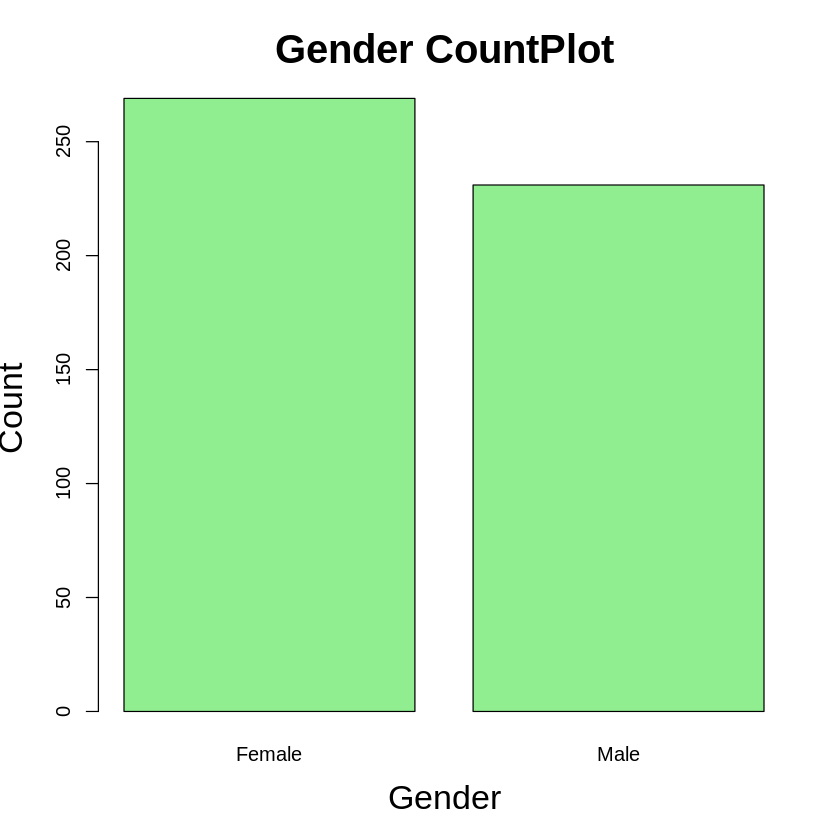

In [ ]:
gender <- table(advert_click$Male)
#tags for the gender
tag <- c("Female","Male")
barplot(gender,names.arg = tag,col = "lightgreen", xlab='Gender', ylab ='Count', main = 'Gender CountPlot', cex.main =2, cex.lab = 1.7)

The barplot shows that more females clicked on ads than males on the site.

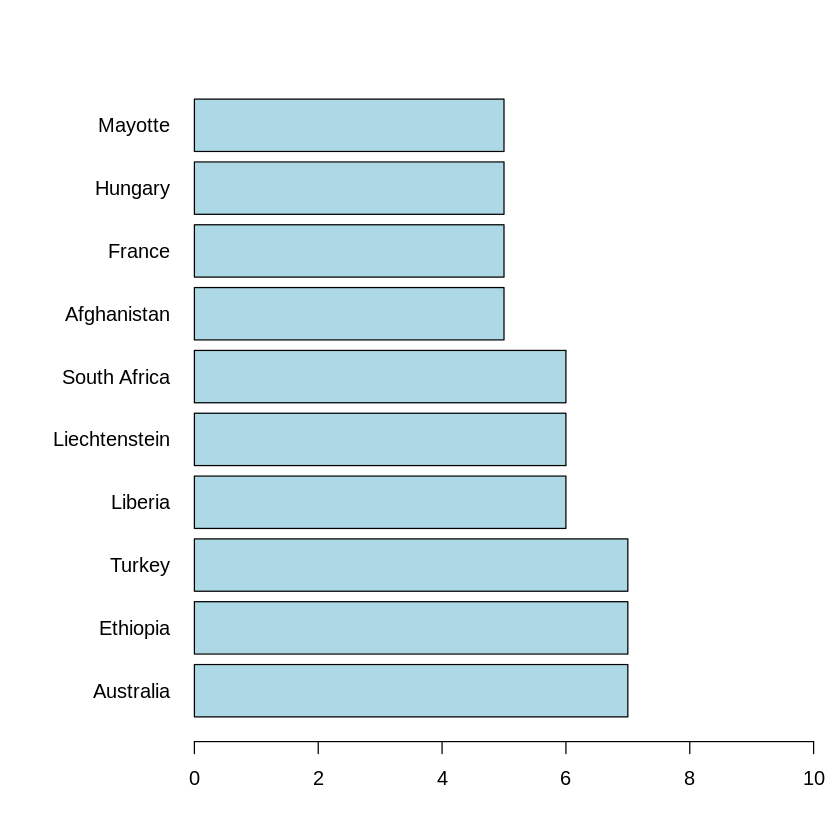

In [ ]:
#Horizontal barplot of top 10 countries
#setting margins so that the country names can be visible in the plot
par(mar=c(4,8,3,1)+.1)
#Country <- advert_click
country_top10 <- head(sort(table(advert_click$Country), decreasing= TRUE), n = 10)
barplot(country_top10,xlim = c(0,10), las=1, horiz = TRUE , col = 'lightblue')

In [ ]:
countries <- head(sort(table (advert_click$Country), decreasing = TRUE))
countries


    Australia      Ethiopia        Turkey       Liberia Liechtenstein 
            7             7             7             6             6 
 South Africa 
            6 

The top 3 countries where most ads were clicked were Australia , Ethiopia, Turkey.

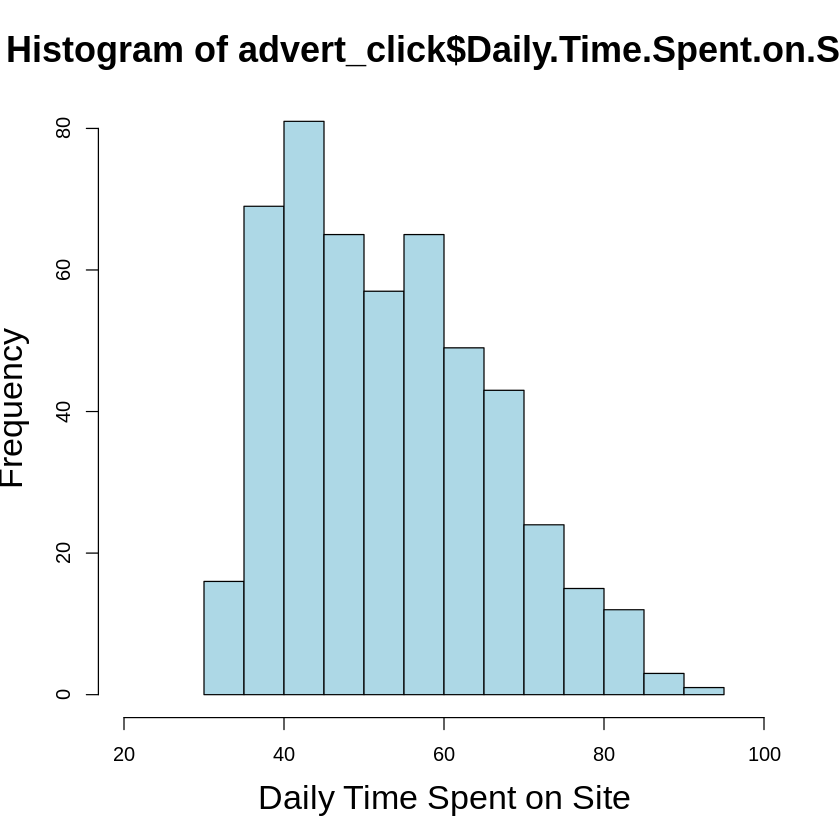

In [ ]:
#Histogram of daily_time_spent_on_site
hist(advert_click$Daily.Time.Spent.on.Site,xlim = c(20,100), xlab ='Daily Time Spent on Site' ,col = 'lightblue', cex.main =1.7 , cex.lab = 1.7)

The distribution is right skewwed. The more time the individual spent on the site the less ads the individual clicked. 

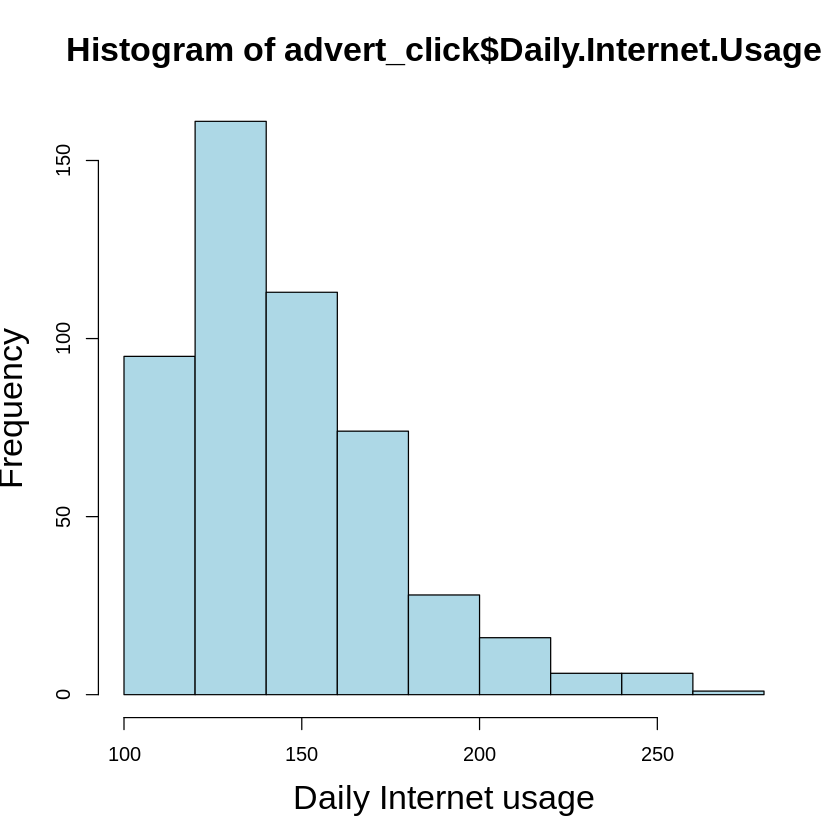

In [ ]:
#Histogram of daily internet usage_
hist(advert_click$Daily.Internet.Usage, xlab ='Daily Internet usage', cex.lab = 1.7,cex.main = 1.7 ,col = 'lightblue')

Daily internet usage was also right-skewed. Meaning that those spending more time on the internet and at
the same time clicked on the ad were not common.

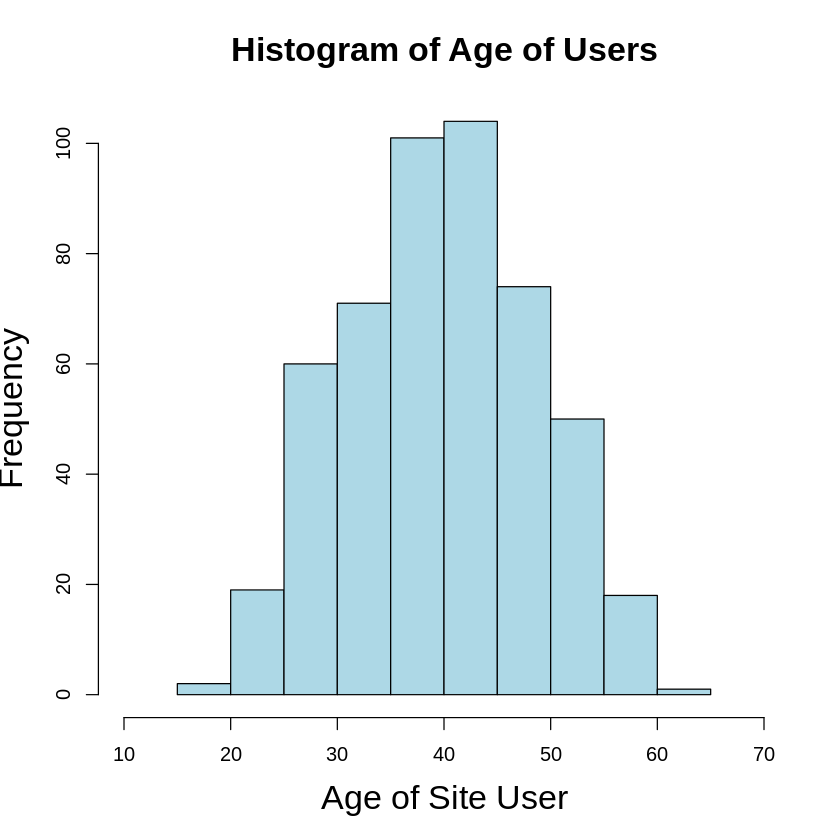

In [ ]:
# Distribution of age of users who clicked on the ad 

hist(advert_click$Age,xlim = c(10,70) ,xlab ='Age of Site User',cex.lab = 1.7, cex.main = 1.7, main ='Histogram of Age of Users', col = 'lightblue')

The distribution is normal which means individuals aged betwen 35 and 45 clicked on the ads more than individuals of other ages.  

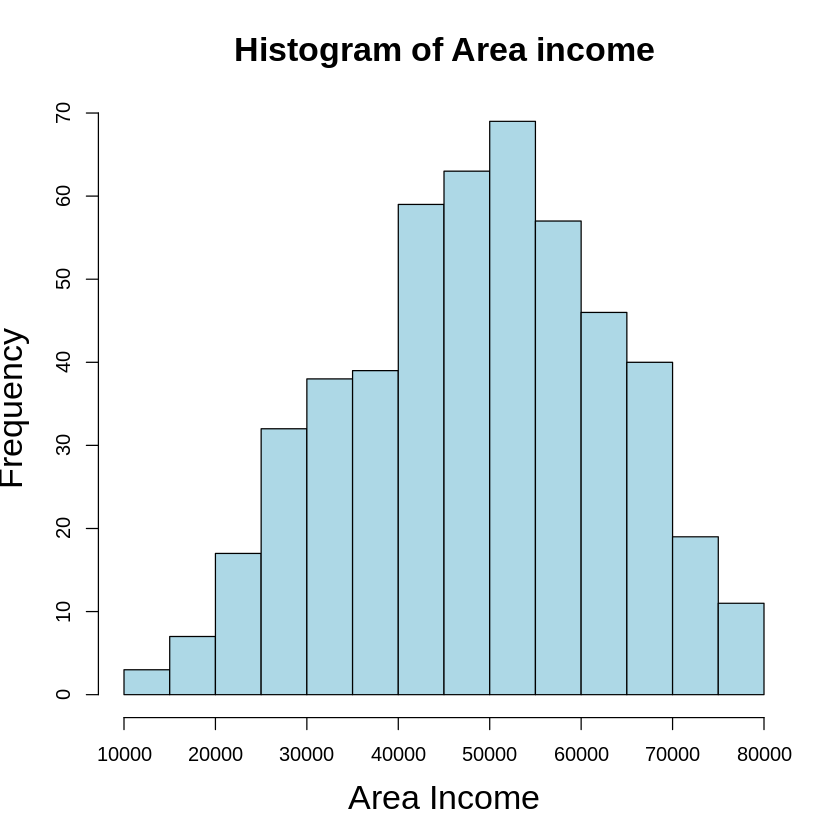

In [ ]:
# Distribution of area income of individuals who clicked on the ad 

hist(advert_click$Area.Income ,xlab ='Area Income',cex.lab = 1.7, cex.main = 1.7, main ='Histogram of Area income', col = 'lightblue')

# Observations

The following are findings and observations from the analysis: 

i) There are more female browsers than male 

ii) The average daily time an individual spent on the site was 65 and the avearge daily internet usage was 180.Moreover distributions of the daily time an individual spent on the site and the daily internet usage of individuals who clicked on the ads are right skwewwed. 

iii) More individuals aged between 20 and 45 years browsed the site while more individuals aged between 35 and 45 years clicked o the ads while on the site.

iv) The distribution of area income is left skewwed

#  Reccomendations based on EDA 

Based on the analysis the following are the reccommendations given to the Kenyan enterprenuer:

The enterprenuer should focus on individuals aged between 35 and 45 years as well as more female browsers since they are more likely to click on the ads than other individuals. Moreover, the enterpernuer should put more focus on individuals living in Australia, Ethiopia , Turkey since most ads were clicked in these countries. Finally the most individuals who clicked on ads had an area income of between 40000 and 60000.
 

# Modelling 

## Decision Tree

In [13]:
install.packages('caret') #dependencies=T)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("rpart.plot")
library(rpart.plot)
library(rpart)

In [ ]:
# dropping irrelevant columns
mod_ads <- subset(data, select = -c(Timestamp, Country, City, Ad.Topic.Line) )
head(mod_ads)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
1,68.95,35,61833.90,256.09,0,0
2,80.23,31,68441.85,193.77,1,0
3,69.47,26,59785.94,236.50,0,0
4,74.15,29,54806.18,245.89,1,0
5,68.37,35,73889.99,225.58,0,0
6,59.99,23,59761.56,226.74,1,0


In [ ]:
#data splicing
set.seed(12345)
train <- sample(1:nrow(mod_ads),size = ceiling(0.80*nrow(mod_ads)),replace = FALSE)
# training set
mod_ads_train <- mod_ads[train,]
# test set
mod_ads_test <- mod_ads[-train,]

In [ ]:
# building the classification tree with rpart

tree <- rpart(Clicked.on.Ad~.,
data=mod_ads_train,
method = "class")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: rpart



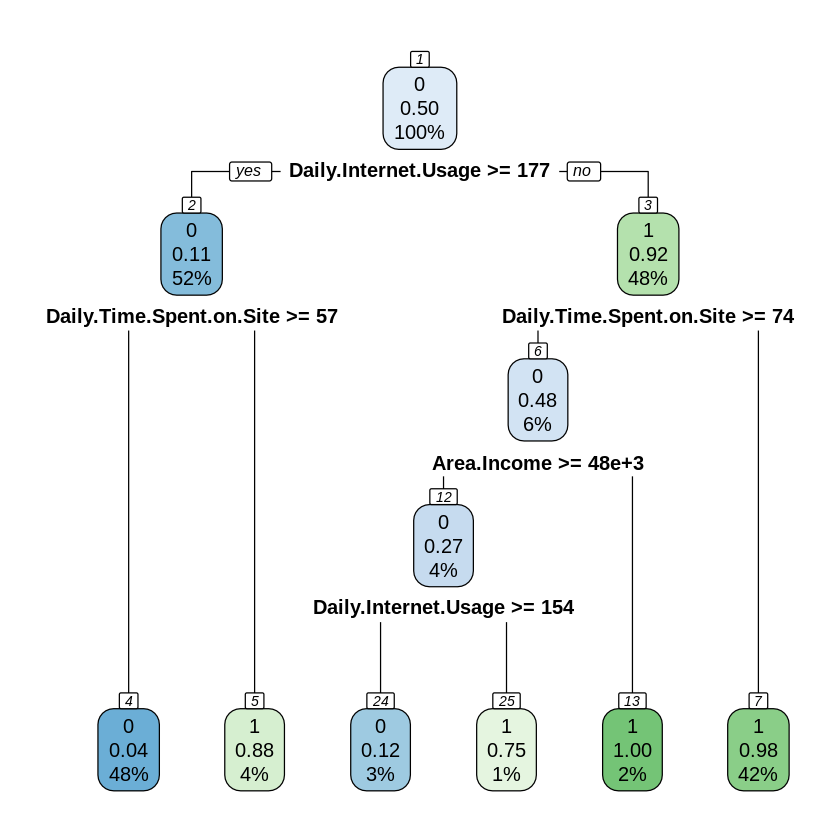

In [ ]:
# Visualize the decision tree with rpart.plot
#library(rpart.plot)
rpart.plot(tree, nn=TRUE)

In [ ]:
#Testing the model
pred <- predict(object = tree,  
                            newdata = mod_ads_test,   
                            type = "class")

pred

20   22   29   35   39   58   78   87   97   98  100  101  102  105  116  126 
   1    0    1    1    1    1    0    0    1    1    0    1    0    0    0    0 
 134  141  143  147  151  155  160  163  168  178  179  183  186  191  194  206 
   0    0    1    1    1    0    0    0    0    0    1    1    1    1    1    1 
 209  213  219  221  223  224  228  235  236  237  241  254  273  277  284  288 
   1    0    1    0    1    1    1    1    1    1    1    1    0    0    0    0 
 293  295  298  299  301  305  306  308  310  317  321  327  328  330  331  334 
   1    1    0    0    0    1    0    0    1    0    1    1    0    1    0    0 
 344  350  353  362  365  366  384  386  397  398  402  408  416  426  427  431 
   0    0    0    1    0    1    0    0    1    1    0    1    1    1    1    0 
 434  437  443  447  460  461  462  466  477  482  489  492  501  505  507  523 
   0    1    1    1    0    1    1    1    0    0    1    1    1    1    0    0 
 524  530  542  551  556  557  560  563  569  573  575  581  593  594  596  599 
   1    1    0    0    0    1    0    0    0    0    1    1    0    0    1    0 
 602  609  616  626  627  630  631  632  636  641  642  646  650  666  671  673 
   1    1    1    1    0    0    0    0    1    1    0    1    0    0    0    0 
 679  683  685  688  693  695  696  703  705  707  711  712  722  731  732  734 
   1    1    1    0    0    0    0    0    0    1    1    0    1    0    0    1 
 738  743  750  755  756  758  761  762  774  782  789  792  793  797  801  805 
   1    0    1    0    0    1    0    0    0    1    0    1    1    0    1    1 
 808  811  814  828  832  839  842  844  848  850  860  865  870  875  879  886 
   1    1    0    1    1    1    1    0    0    1    0    0    0    0    0    1 
 892  894  897  904  907  910  915  916  921  926  936  939  940  947  954  959 
   1    0    0    0    1    0    1    1    0    1    0    1    0    0    1    0 
 961  975  977  989  990  992  997 1000 
   1    1    1    0    0    1    1    1 
Levels: 0 1

In [ ]:
install.packages('e1071')
library(e1071)

#Calculating accuracy
conf.ads <- confusionMatrix(data = pred,
                reference = pred)
conf.ads

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  99   0
         1   0 101
                                     
               Accuracy : 1          
                 95% CI : (0.9817, 1)
    No Information Rate : 0.505      
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.000      
            Specificity : 1.000      
         Pos Pred Value : 1.000      
         Neg Pred Value : 1.000      
             Prevalence : 0.495      
         Detection Rate : 0.495      
   Detection Prevalence : 0.495      
      Balanced Accuracy : 1.000      
                                     
       'Positive' Class : 0          
                                     

Conclusion The output shows that all the samples in the test dataset have been correctly classified and wve attained an accuracy of 100% on the test data set with a 95% confidence interval (0.9817, 1). Thus we can correctly classify if a individual clicked on an ad or not with this decision tree. 

## SVM Model

In [50]:
# installing the necessary packages
install.packages("numDeriv")
library(numDeriv)
library(caret)

install.packages("kernlab")

install.packages('e1071')
library(e1071)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [51]:
# Splitting the data into training set and testing set. 
intrain <- createDataPartition(y = data$Clicked.on.Ad, p= 0.7, list = FALSE)
training <- data[intrain,]
testing <- data[-intrain,]

In [52]:
# checking the dimensions of the train and test sets.
dim(training)
dim(testing)

[1] 700  10

[1] 300  10

In [53]:
# Factorizing the categorical variable
training[["clicked.on.ad"]] = factor(training[["Clicked.on.Ad"]])

In [54]:
# Controlling all the computational overheads using the traincolntrol() method
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

In [55]:
# Checking the result of the train model
svm_Linear <- train(Clicked.on.Ad ~ Daily.Time.Spent.on.Site +
 Age + Area.Income + Daily.Internet.Usage , data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

In [56]:
# Making Predictions
test_pred <- predict(svm_Linear, newdata = testing)
test_pred

[1] Not clicked Not clicked Not clicked Clicked     Not clicked Not clicked
  [7] Clicked     Not clicked Not clicked Clicked     Clicked     Clicked    
 [13] Clicked     Not clicked Clicked     Not clicked Not clicked Clicked    
 [19] Not clicked Not clicked Clicked     Not clicked Clicked     Clicked    
 [25] Clicked     Clicked     Not clicked Clicked     Not clicked Not clicked
 [31] Clicked     Not clicked Clicked     Not clicked Clicked     Not clicked
 [37] Clicked     Clicked     Not clicked Not clicked Clicked     Clicked    
 [43] Not clicked Not clicked Not clicked Not clicked Not clicked Not clicked
 [49] Clicked     Not clicked Not clicked Clicked     Not clicked Clicked    
 [55] Not clicked Not clicked Not clicked Clicked     Not clicked Clicked    
 [61] Clicked     Clicked     Not clicked Not clicked Not clicked Not clicked
 [67] Not clicked Not clicked Clicked     Clicked     Not clicked Clicked    
 [73] Not clicked Clicked     Clicked     Not clicked Clicked     Clicked    
 [79] Clicked     Clicked     Clicked     Not clicked Not clicked Clicked    
 [85] Clicked     Clicked     Not clicked Not clicked Not clicked Not clicked
 [91] Not clicked Clicked     Not clicked Not clicked Not clicked Not clicked
 [97] Not clicked Clicked     Not clicked Clicked     Not clicked Clicked    
[103] Not clicked Clicked     Clicked     Clicked     Not clicked Not clicked
[109] Clicked     Not clicked Clicked     Not clicked Not clicked Not clicked
[115] Clicked     Not clicked Not clicked Clicked     Clicked     Clicked    
[121] Clicked     Not clicked Not clicked Not clicked Not clicked Clicked    
[127] Not clicked Not clicked Clicked     Clicked     Not clicked Not clicked
[133] Not clicked Not clicked Clicked     Clicked     Not clicked Not clicked
[139] Not clicked Clicked     Clicked     Not clicked Not clicked Clicked    
[145] Clicked     Not clicked Not clicked Clicked     Clicked     Clicked    
[151] Clicked     Clicked     Clicked     Clicked     Clicked     Clicked    
[157] Not clicked Clicked     Not clicked Not clicked Not clicked Not clicked
[163] Not clicked Not clicked Clicked     Not clicked Not clicked Clicked    
[169] Not clicked Clicked     Clicked     Not clicked Clicked     Clicked    
[175] Clicked     Clicked     Clicked     Clicked     Not clicked Clicked    
[181] Not clicked Clicked     Not clicked Not clicked Not clicked Not clicked
[187] Not clicked Clicked     Not clicked Not clicked Clicked     Not clicked
[193] Not clicked Clicked     Not clicked Not clicked Not clicked Clicked    
[199] Not clicked Not clicked Clicked     Not clicked Not clicked Clicked    
[205] Not clicked Clicked     Clicked     Not clicked Not clicked Not clicked
[211] Not clicked Clicked     Clicked     Clicked     Clicked     Clicked    
[217] Not clicked Not clicked Clicked     Clicked     Clicked     Clicked    
[223] Clicked     Not clicked Not clicked Not clicked Not clicked Not clicked
[229] Clicked     Clicked     Not clicked Clicked     Not clicked Not clicked
[235] Clicked     Clicked     Clicked     Clicked     Clicked     Clicked    
[241] Not clicked Not clicked Clicked     Not clicked Not clicked Not clicked
[247] Clicked     Clicked     Clicked     Clicked     Clicked     Clicked    
[253] Not clicked Not clicked Clicked     Not clicked Not clicked Not clicked
[259] Not clicked Not clicked Not clicked Clicked     Not clicked Not clicked
[265] Clicked     Clicked     Not clicked Not clicked Not clicked Clicked    
[271] Clicked     Clicked     Not clicked Clicked     Not clicked Clicked    
[277] Clicked     Clicked     Clicked     Clicked     Clicked     Clicked    
[283] Clicked     Clicked     Not clicked Not clicked Not clicked Clicked    
[289] Clicked     Clicked     Not clicked Not clicked Not clicked Clicked    
[295] Clicked     Not clicked Not clicked Clicked     Clicked     Clicked    
Levels: Not clicked Clicked

## Binary Classification with Logistic Regression 

In [59]:
# Splitting the data into train and test
index <- createDataPartition(data$Clicked.on.Ad, p = .70, list = FALSE)
train <- data[index, ]
test <- data[-index, ]

# Training the model
logistic_model <- glm(Clicked.on.Ad ~  Daily.Time.Spent.on.Site +
 Age + Area.Income + Daily.Internet.Usage + factor (Male), family = binomial(), train)

In [60]:
# checking the model 
summary(logistic_model)


Call:
glm(formula = Clicked.on.Ad ~ Daily.Time.Spent.on.Site + Age + 
    Area.Income + Daily.Internet.Usage + factor(Male), family = binomial(), 
    data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.41684  -0.16468  -0.04604   0.02285   2.95966  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               2.570e+01  3.043e+00   8.444  < 2e-16 ***
Daily.Time.Spent.on.Site -1.864e-01  2.422e-02  -7.694 1.42e-14 ***
Age                       1.539e-01  2.842e-02   5.415 6.12e-08 ***
Area.Income              -1.301e-04  2.114e-05  -6.157 7.44e-10 ***
Daily.Internet.Usage     -5.577e-02  7.132e-03  -7.821 5.26e-15 ***
factor(Male)1            -1.591e-01  4.658e-01  -0.341    0.733    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 970.41  on 699  degrees of freedom
Residual deviance: 140.40  on 694  degr

In [66]:
# Predicting in the test dataset
pred_prob <- predict(logistic_model, test, type = "response")
pred_prob

7          10          12          13          15          24 
0.011851579 0.130049713 0.005178048 0.999023319 0.999978195 0.007257914 
         27          28          30          33          35          49 
0.999767763 0.999901334 0.057503736 0.999973465 0.999961808 0.999899877 
         51          52          55          57          63          64 
0.028235549 0.006221735 0.998500671 0.709838858 0.119601628 0.027343814 
         65          69          72          77          82          84 
0.999476729 0.009246816 0.099502422 0.999461540 0.008075966 0.999919259 
         85          95          97         100         101         102 
0.063402290 0.999929018 0.999983999 0.007187904 0.999996375 0.066175602 
        108         112         113         114         115         121 
0.999238826 0.566960916 0.036891573 0.999994970 0.014876364 0.006787048 
        124         127         130         136         137         142 
0.999110647 0.956006911 0.024068634 0.999983498 0.999981303 0.999320561 
        143         145         150         153         156         158 
0.998385680 0.063341169 0.994838959 0.999995955 0.008417490 0.944644149 
        163         167         174         179         180         181 
0.011342845 0.999960892 0.162034245 0.999931217 0.007397241 0.999993202 
        190         194         198         202         203         204 
0.999989164 0.999990356 0.005235718 0.018439485 0.999988298 0.061228662 
        205         206         215         220         224         227 
0.014627246 0.999550506 0.008758885 0.999986279 0.880756071 0.999392897 
        231         236         237         245         249         257 
0.018191531 0.999995132 0.920422487 0.086207931 0.999988419 0.004578854 
        260         263         264         265         266         267 
0.988836942 0.907073859 0.999982162 0.012647554 0.981722863 0.821882194 
        270         273         275         282         283         286 
0.011026492 0.011181898 0.010408668 0.998781912 0.999939371 0.023601613 
        292         304         305         308         313         315 
0.007330788 0.800930725 0.999988148 0.005459402 0.527119646 0.010323484 
        317         322         323         327         339         343 
0.124562314 0.060664370 0.065497723 0.999904152 0.016717321 0.021299492 
        345         348         350         351         353         358 
0.973630046 0.999820836 0.504372642 0.008235717 0.005766420 0.999963800 
        360         361         362         365         366         370 
0.007494665 0.999509072 0.998256398 0.033312875 0.990655506 0.030932092 
        381         382         383         389         392         393 
0.005458136 0.999959707 0.081578010 0.030865436 0.025321456 0.009402315 
        394         396         398         400         401         403 
0.087069929 0.078509450 0.408119178 0.010370479 0.999928596 0.999996676 
        405         406         410         411         418         420 
0.999965685 0.013956887 0.999989179 0.999902271 0.008728277 0.444466318 
        422         434         437         438         440         443 
0.021110311 0.006426468 0.572998587 0.009557400 0.176252530 0.999938418 
        445         455         456         458         461         464 
0.999979382 0.963905139 0.018928244 0.022292840 0.999993238 0.999966058 
        471         473         480         481         489         490 
0.989467677 0.019181370 0.998951200 0.261092681 0.999992762 0.008594620 
        491         493         495         506         514         519 
0.999990208 0.163285704 0.996894036 0.015186836 0.999867685 0.999980080 
        521         524         525         527         528         529 
0.999330609 0.973333477 0.004334693 0.999466625 0.214386433 0.999996985 
        531         532         536         538         541         545 
0.998670745 0.999970327 0.007183526 0.060343969 0.006908590 0.008966033 
        549         550         551         552         553         

In [67]:
# Converting from probability to actual output
train$pred_class <- ifelse(logistic_model$fitted.values >= 0.5, ">50K", "<=50K")
# Generating the classification table
ctab_train <- table(train$Clicked.on.Ad, train$pred_class)
ctab_train

   
    <=50K >50K
  0   343    7
  1    15  335

In [68]:
# Converting from probability to actual output
test$pred_class <- ifelse(pred_prob >= 0.5, ">50K", "<=50K")
# Generating the classification table
ctab_test <- table(test$Clicked.on.Ad, test$pred_class)
ctab_test

   
    <=50K >50K
  0   146    4
  1     2  148

In [70]:
#Accuracy = (TP + TN)/(TN + FP + FN + TP)
# Accuracy in Training dataset
accuracy_train <- sum(diag(ctab_train))/sum(ctab_train)*100
accuracy_train

[1] 96.85714

Our logistics model is able to classify 96.8% of all the observations correctly in the training dataset.

In [71]:
# Accuracy in Test dataset
accuracy_test <- sum(diag(ctab_test))/sum(ctab_test)*100
accuracy_test

[1] 98

The over all correct classification accuracy in test dataset is 98% which is comparable to train dataset. This shows that our model is performing good.

# Challenge the Solution 

The supervised model used that is decison trees can be challenged using other supervised learning algorithms such as KNN. Thereafter compare the models accuracy and perfomance.

From the models above the binary classification of either clicked or not clicked with logistic regression model performed the best with the train and test sets accuracy being almost similar. 

# Follow Up Questions


a) Did we have the right data

Yes, we had the right data. The model built gave a high accuracy which means we can predict if an individual clicked on the ad or not with confidence. 






b) Did we have the right analysis question 

yes, The analysis question was appropriate.



c) Do we need another data to answer the question 

The data was suuficient.  